In [55]:
# TODOP modularize the project

import numpy as np # Array computing
import pandas as pd # Data structure
import matplotlib.pyplot as plt # Plots
import seaborn as sns # Data visualization

# Read the data
df = pd.read_csv("../res/data/data.csv")

In [56]:
# 1) Quick look at the data structure

# 1.1) Get insights
# TODO2 more statistic
# TODO2 see outliers

# First 5 rows of data
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [57]:
# Columns of the dataset
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [58]:
# Statistic about the data
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [59]:
# Dimensionality of the dataset
df.shape

(569, 33)

In [60]:
# Summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [61]:
# Histogram of all features
#%matplotlib inline
#data.hist(bins=50, figsize=(20, 15))
#plt.show()

In [62]:
# 1.2) Categorical variables conversion and little cleaning
# Convert diagnosis (B(enign)=0, M(alignant)=1) (before dividing features from labels)
df["diagnosis"] = df["diagnosis"].astype('category').cat.codes

# Remove useless columns
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

In [63]:
# 1.3) Feature scaling
# TODO (+ do correctly [on train/test set]) [only some alg. are affected if not done]
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(df) # scaling

In [64]:
# 1.4) Train/test set creation

# Divide features from labels
X = df.drop('diagnosis', axis=1)
y = df.diagnosis

# Create a stratified train and test set
from sklearn.model_selection import train_test_split # sklearn: ML library
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # 80% train set, 20% test set

In [65]:
# 1.3) Discover and visualize the data
# TODO2 graphs (violin, etc.)

In [66]:
# 1.4.1) Look for correlations with the target
corr_matrix = df.corr()
corr_matrix["diagnosis"].sort_values(ascending=False) # Correlation with the target

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0

In [67]:
# 1.4.2) Look for correlations between features (not target) for feature selection/extraction
# TODOQ?

In [68]:
# 1.4.3) Attribute combinations
# TODOQ?

In [69]:
# 2) Prepare the data for ML algorithms

# 2.1) Data cleaning and text/categorical attributes
# TODOQ?

In [70]:
# 2.2) Custom trasformers and trasformation pipelines
# TODOQ?

In [71]:
# 3) Select and train a model
# TODOP do an unique array (matrix) for all stats?
accuracies = {}
auc = {}
# TODO more metrics: (rmse for regression), recall (sensitivity), precision, specificity, f_score, cross_val_score, roc_auc

In [72]:
# Plot the roc curve
def plot_roc_curve(model, fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.savefig("../res/plots/roc_"+model+".png")
    plt.show()
    

In [73]:
#def plotDecisionBoundaries():

# 3.1) Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver="liblinear") # liblinear ideal for small dataset
lr.fit(X_train, y_train)
acc = lr.score(X_test, y_test)*100
accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 93.86%


AUC 99.37%


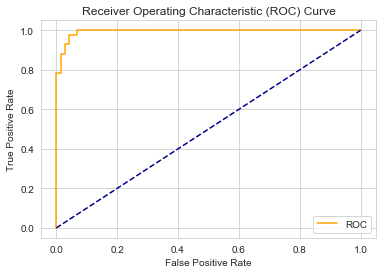

In [74]:
# ROC_AUC score
# TODOP decouple
from sklearn.metrics import roc_auc_score
probs = lr.predict_proba(X_test)
probs = probs[:, 1] # probs of positive class
auc_s = roc_auc_score(y_test, probs)*100
auc['Logistic Regression'] = auc_s
print("AUC {:.2f}%".format(auc_s))

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve("lr", fpr, tpr)

In [75]:
# cross_val_score
from sklearn.model_selection import cross_val_score
print("Cross validation score with several folds: ")
print(cross_val_score(lr, X_train, y_train, cv=10, scoring="accuracy"))

Cross validation score with several folds: 
[0.95652174 0.97826087 0.97826087 1.         0.95652174 0.93333333
 0.91111111 0.93333333 0.93333333 0.93333333]


In [76]:
# 3.2) SGDClassifier
from sklearn.linear_model import SGDClassifier
sgdc = SGDClassifier()
sgdc.fit(X_train, y_train)
acc = sgdc.score(X_test, y_test)*100
accuracies['SGDC'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 89.47%


Test Accuracy 94.74%


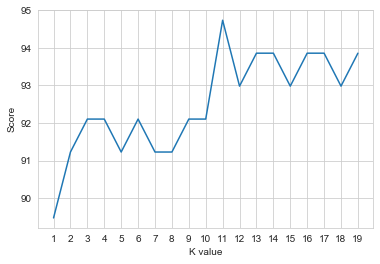

In [77]:
# 3.3) KNN Classification
from sklearn.neighbors import KNeighborsClassifier

def best_n_of_neighbors(score_list, X_train, y_train, X_test, y_test):
    for i in range(1, 20):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train, y_train)
        score = knn.score(X_test, y_test)*100
        score_list.append(score)
    
    return score_list.index(max(score_list))+1

def knn_score_plot(score_list):
    plt.plot(range(1, 20), score_list)
    plt.xticks(np.arange(1, 20, 1))
    plt.xlabel("K value")
    plt.ylabel("Score")
    plt.savefig("../res/plots/knn_neighbors.png")
    plt.show()

score_list = []
knn = KNeighborsClassifier(n_neighbors=best_n_of_neighbors(score_list, X_train, y_train, X_test, y_test))
knn.fit(X_train, y_train)
acc = knn.score(X_test, y_test)*100
accuracies['KNN'] = acc
print("Test Accuracy {:.2f}%".format(acc))

knn_score_plot(score_list)

In [78]:
# 3.4.1) SVM with no feature scaling
# TODO1 nonlinear svm?
from sklearn.svm import SVC
svm = SVC(random_state=42, gamma="auto") # performs poorly if no feature scaling (gamma="scale" solves)
svm.fit(X_train, y_train)
acc = svm.score(X_test, y_test)*100
accuracies['SVM no feature scaling'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 63.16%


In [79]:
# 3.4.2) SVM with feature scaling and grid search
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

svm = Pipeline([
    ("scaler", StandardScaler()),
    ("lsvc", LinearSVC(C=0.1, loss="hinge")) # Alternatives: SVC(kernel="linear"), SGDClassifier(loss="hinge", alpha=1/(m*C))
])
svm.fit(X_train, y_train)
acc = svm.score(X_test, y_test)*100
accuracies['SVM + scaling/search'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 98.25%


In [80]:
# Grid search for SVM
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'lsvc__C': [0.1, 0.2, 0.4, 0.6, 0.8, 1]} # lsvc name in the pipeline, double underscore means to selet that parameter annotated after it
]

grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train, y_train)
#grid_search.best_params_
grid_search.best_estimator_


Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lsvc',
                 LinearSVC(C=0.1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [81]:
# 3.5) Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
acc = nb.score(X_test, y_test)*100
accuracies['Gaussian NB'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 93.86%


In [82]:
# 3.6) Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
acc = dt.score(X_test, y_test)*100
accuracies['Decision Tree'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 92.98%


In [83]:
# 3.7.1) Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)
acc = rf.score(X_test, y_test)*100
accuracies['Random Forest'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 97.37%


In [84]:
# 3.7.2) Random Forest with grid search
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(bootstrap=False, max_features=6, n_estimators=100, warm_start=False)
rf.fit(X_train, y_train)
acc = rf.score(X_test, y_test)*100
accuracies['Random Forest + search'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 97.37%


In [85]:
# Grid search for Random Forest
# TODOP decouple
from sklearn.model_selection import GridSearchCV

param_grid = [
    #{'n_estimators': [3, 10, 50, 100, 200, 500], 'max_features': [2, 6, 10]},
    {'bootstrap': [False], 'n_estimators': [3, 10, 50, 100, 200, 500], 'max_features': [2, 6, 10]},
    {'warm_start': [True], 'n_estimators': [3, 10, 50, 100, 200, 500], 'max_features': [2, 6, 10]}
]

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train, y_train)
#grid_search.best_params_
grid_search.best_estimator_
#cvres = grid_search.cv_results_
#for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
#    print(np.sqrt(-mean_score), params)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=None, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [86]:
# 3.8) Fine-tuning
# TODO ensemble
# Done before (randomized search instead of grid search if large search space)
# TODO2 randomized search

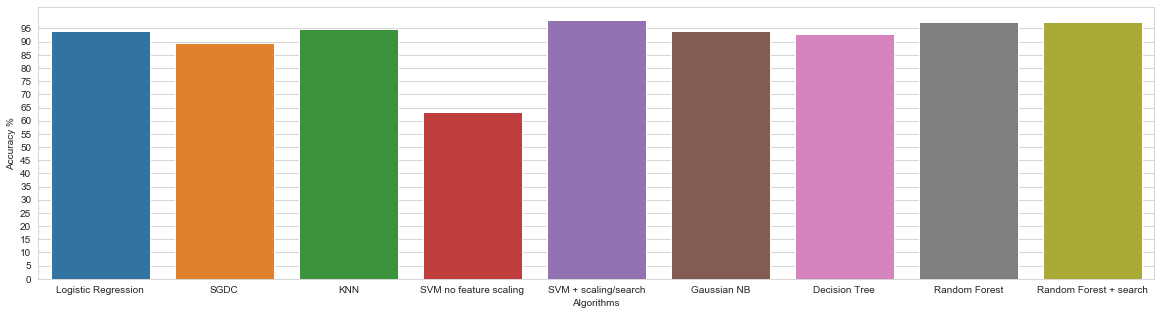

In [87]:
# 3.9) Comparison

def plot_accuracy(accuracies):
    sns.set_style("whitegrid")
    plt.figure(figsize=(20,5))
    plt.yticks(np.arange(0,100,5))
    plt.ylabel("Accuracy %")
    plt.xlabel("Algorithms")
    sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
    plt.savefig("../res/plots/accuracies.png")
    plt.show()

plot_accuracy(accuracies)

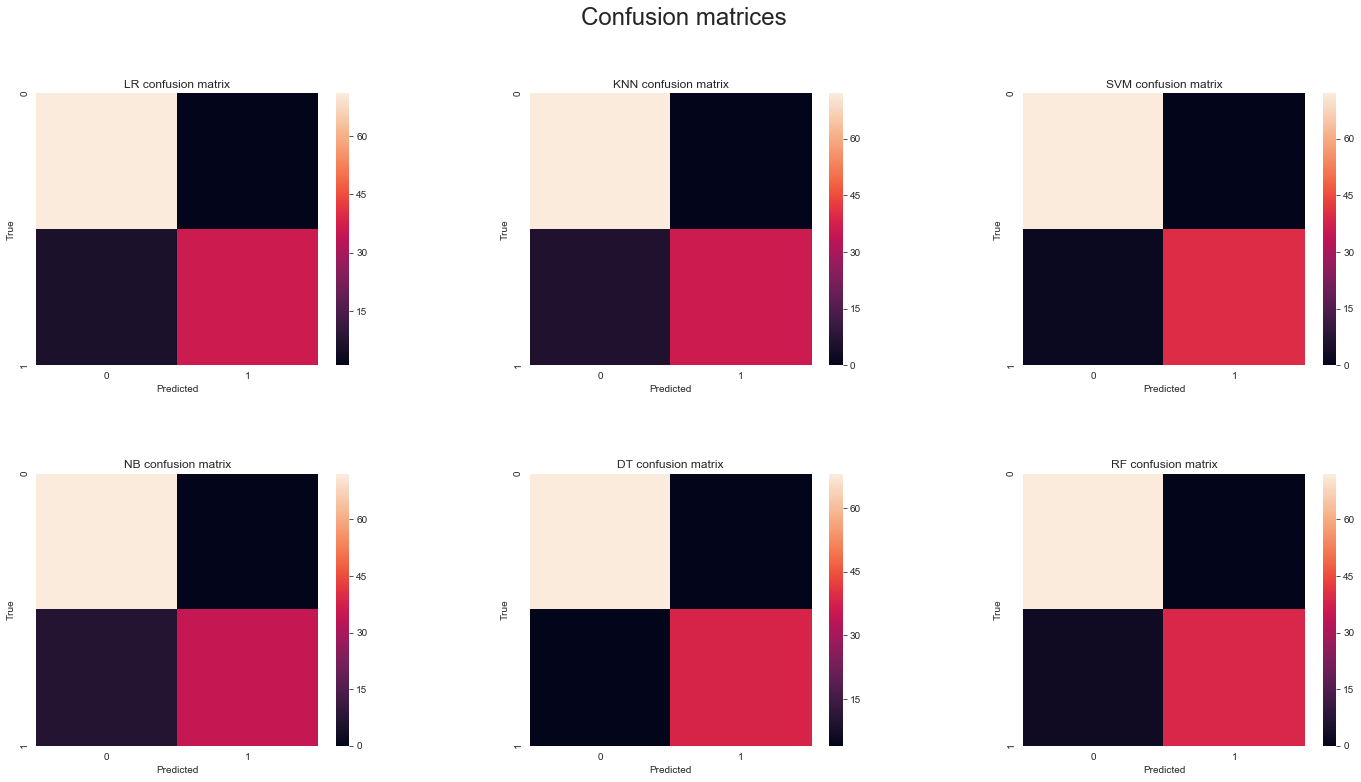

In [88]:
# 3.10) Confusion matrix
# TODOP refactor

def plot_confusion_matrices(cms):
    plt.figure(figsize=(24,12))
    
    plt.suptitle("Confusion matrices", fontsize=24)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    
    plt.subplot(2,3,1)
    plt.title("LR confusion matrix")
    sns.heatmap(cms["lr"])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    plt.subplot(2,3,2)
    plt.title("KNN confusion matrix")
    sns.heatmap(cms["knn"])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    plt.subplot(2,3,3)
    plt.title("SVM confusion matrix")
    sns.heatmap(cms["svm"])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    plt.subplot(2,3,4)
    plt.title("NB confusion matrix")
    sns.heatmap(cms["nb"])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    plt.subplot(2,3,5)
    plt.title("DT confusion matrix")
    sns.heatmap(cms["dt"])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    plt.subplot(2,3,6)
    plt.title("RF confusion matrix")
    sns.heatmap(cms["rf"])
    #sns.heatmap(cms["rf"], annot=True, cmap = "Blues", fmt="d", cbar = False, annot_kws={"size": 40})
    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    plt.savefig("../res/plots/ConfusionMatrices.png")
    plt.show()

def plot_confusion_matrix(cms, model):
    labels = ['Benign', 'Malignant']
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cms[model])
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.savefig("../res/plots/ConfusionMatrix_"+model+".png")
    plt.show()

heads = {}   
heads["lr"] = lr.predict(X_test)
#heads["sgdc"] = lr.predict(X_test) # not inserted
heads["knn"] = knn.predict(X_test)
heads["svm"] = svm.predict(X_test)
heads["nb"] = nb.predict(X_test)
heads["dt"] = dt.predict(X_test)
heads["rf"] = rf.predict(X_test)

cms = {}
from sklearn.metrics import confusion_matrix
cms["lr"] = confusion_matrix(y_test, heads["lr"])
#cms["sgdc"] = confusion_matrix(y_test, heads["sgdc"]) # not inserted
cms["knn"] = confusion_matrix(y_test, heads["knn"])
cms["svm"] = confusion_matrix(y_test, heads["svm"])
cms["nb"] = confusion_matrix(y_test, heads["nb"])
cms["dt"] = confusion_matrix(y_test, heads["dt"])
cms["rf"] = confusion_matrix(y_test, heads["rf"])

plot_confusion_matrices(cms)
#plot_confusion_matrix(cms, "lr")

# TODO plots and metrics to see if under/over fitting